In [ ]:
#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
train=pd.read_csv("/Users/zhangqian/Desktop/WEB Economics final project/mao_processed data/train_index.csv")

In [87]:
train['payprice'].describe()

count    2.697738e+06
mean     8.025102e+01
std      6.236699e+01
min      0.000000e+00
25%      3.300000e+01
50%      7.000000e+01
75%      1.010000e+02
max      3.000000e+02
Name: payprice, dtype: float64

In [76]:
orig_train=pd.read_csv("/Users/zhangqian/Desktop/WEB Economics final project/dataset/train.csv")

In [42]:
citylist=list(orig_train['city'].value_counts())

#Data analysis

In [60]:
def city_ctr(i):
    one_city_data=orig_train[orig_train.city==i]
    ctr_city_i=sum(one_city_data.click)/sum(orig_train.click)
    return ctr_city_i

all_city_ctr_list=[]
for i in range(0,len(citylist)):
    all_city_ctr_list.append(city_ctr(i))

In [61]:
city=range(0,len(citylist))

In [62]:
len(city),len(all_city_ctr_list)

(370, 370)

In [21]:
weekday_ctr=[0.000630, 0.000678,0.000908,0.000908,0.000861,0.000791,0.000560]
weekday=[0,1,2,3,4,5,6]

In [31]:
plt.plot(weekday,weekday_ctr,)
plt.xlabel('Weekdays')
plt.ylabel('CTR')
#plt.show()
#plt.tight_layout()
#plt.savefig('allhourctr.png',dpi=400)

In [35]:
def hour_ctr(i):
    hour_data=orig_train[orig_train.hour==i]
    ctr_weekday_i=sum(hour_data.click)/sum(orig_train.click)
    return ctr_weekday_i

all_hour_ctr_list=[]
for i in range(0,24):
    all_hour_ctr_list.append(hour_ctr(i))

In [40]:
plt.plot(hour,all_hour_ctr_list)
plt.xlabel('Hour')
plt.ylabel('CTR')
#plt.show()
plt.tight_layout()
plt.savefig('allhourctr.png',dpi=400)

##data analysis on different advertiser

In [5]:

advs = [3427, 2997, 3386, 3476, 2821]
dataframes = []
for sta_train in advs:
    df = orig_train[orig_train['advertiser'] == sta_train]
    ctr = df.groupby('weekday').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)
plt.plot(dataframes[0]['ctr'], label=str(advs[0]), marker='*')
plt.plot(dataframes[1]['ctr'], label=str(advs[1]), marker='o')
plt.plot(dataframes[2]['ctr'], label=str(advs[2]), marker='.')
plt.plot(dataframes[3]['ctr'], label=str(advs[3]), marker='*')
plt.plot(dataframes[4]['ctr'], label=str(advs[4]), marker='o')
plt.ylabel('CTR')
plt.xlabel('Weekdays')
plt.margins(0.05)
plt.legend()
plt.tight_layout()
plt.savefig('weekdayCTR.png',dpi=400)

In [8]:
advs = [3427, 2997, 3386, 3476, 2821]
dataframes = []
for sta_train in advs:
    df = orig_train[orig_train['advertiser'] == sta_train]
    ctr = df.groupby('hour').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)
plt.plot(dataframes[0]['ctr'], label=str(advs[0]), marker='*')
plt.plot(dataframes[1]['ctr'], label=str(advs[1]), marker='o')
plt.plot(dataframes[2]['ctr'], label=str(advs[2]), marker='.')
plt.plot(dataframes[3]['ctr'], label=str(advs[3]), marker='*')
plt.plot(dataframes[4]['ctr'], label=str(advs[4]), marker='o')
plt.ylabel('CTR')
plt.xlabel('Hour')
plt.margins(0.05)
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('hourCTR.png',dpi=400)

In [80]:
advs = [3427, 2997, 3386, 3476, 2821]
dataframes = []
for sta_train in advs:
    df = orig_train[orig_train['advertiser'] == sta_train]
    ctr = df.groupby('bidprice').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)
plt.plot(dataframes[0]['ctr'], label=str(advs[0]), marker='*')
plt.plot(dataframes[1]['ctr'], label=str(advs[1]), marker='o')
plt.plot(dataframes[2]['ctr'], label=str(advs[2]), marker='.')
plt.plot(dataframes[3]['ctr'], label=str(advs[3]), marker='*')
plt.plot(dataframes[4]['ctr'], label=str(advs[4]), marker='o')
plt.ylabel('CTR')
plt.xlabel('Bidprice')
plt.margins(0.05)
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('advertiser_bidding.png',dpi=400)

# build CTR estimator

In [3]:
from sklearn import linear_model

In [4]:
l =['IP', 'adexchange', 'creative', 'domain', 'keypage',
       'slotformat', 'slotheight', 'slotid', 'slotvisibility', 'slotwidth',
       'url', 'useragent', 'userid', 'tag0', 'tag1', 'tag2', 'tag3', 'tag4',
       'tag5', 'tag6', 'tag7', 'tag8', 'tag9', 'tag10', 'tag11', 'tag12',
       'tag13', 'tag14', 'tag15', 'tag16', 'tag17', 'tag18', 'tag19', 'tag20',
       'tag21', 'tag22', 'tag23', 'tag24', 'tag25', 'tag26', 'tag27', 'tag28',
       'tag29', 'tag30', 'tag31', 'tag32', 'tag33', 'tag34', 'tag35', 'tag36',
       'tag37', 'tag38', 'tag39', 'tag40', 'tag41', 'tag42', 'tag43', 'tag44',
       'tag45', 'tag46', 'tag47', 'tag48', 'tag49', 'tag50', 'tag51', 'tag52',
       'tag53', 'tag54', 'tag55', 'tag56', 'tag57', 'tag58', 'tag59', 'tag60',
       'tag61', 'tag62', 'tag63', 'tag64', 'tag65', 'tag66', 'tag67', 'tag68',
        'weekday', 'hour', 'region', 'city', 'slotprice', 'bidprice',
       'payprice', 'advertiser']
x=train[l]


In [5]:
y=train['click']

In [6]:
validation=pd.read_csv("/Users/zhangqian/Desktop/WEB Economics final project/mao_processed data/val_index.csv")

In [7]:
validation_data=validation[l]
validation_click=validation['click']

In [8]:
validation_click.value_counts()

0    299523
1       226
Name: click, dtype: int64

In [9]:
validation_avg_ctr=sum(validation.click)/len(validation)
validation_avg_ctr

0.00075396415000550463

In [479]:
lg_regr=linear_model.LogisticRegression(C=10,penalty='l2') 

In [480]:
lg_model = lg_regr.fit(x,y)

In [481]:
lg_predict = lg_model.predict_proba(validation_data)

In [482]:
lg_click_ctr =[]
for l in lg_predict:
    lg_click_ctr.append(l[1])

In [77]:
pctr_lg=pd.DataFrame(lg_click_ctr)
pctr_lg.to_csv('balanced_pctr_lg.csv')

In [485]:
plt.hist(lg_click_ctr,bins=100) #bins=100
plt.xlabel("predicted CTR by Logistic Regression")
plt.ylabel("count")
plt.axvline(x=validation_avg_ctr, color='r')
#plt.show()
plt.tight_layout()
plt.savefig('logistic_regression.png',dpi=400)



In [16]:
#SVC model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC #svc linear/svm linear!!##
#from sklearn.calibration import CalibratedClassifierCV
#from sklearn import ensemble
 #sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)[source]¶

In [17]:
svc_way = CalibratedClassifierCV(LinearSVC())

In [18]:
svc_model=svc_way.fit(x, y) 

In [19]:
#svc_predict=svc_model.predict_proba(validation_data) #LinearSVC' object has no attribute 'predict_proba_proba'
svc_predict=svc_model.predict_proba(validation_data)

In [23]:
svc_predict

array([[  9.99279339e-01,   7.20660652e-04],
       [  9.99212531e-01,   7.87469021e-04],
       [  9.99232032e-01,   7.67967817e-04],
       ..., 
       [  9.99238456e-01,   7.61543512e-04],
       [  9.99267644e-01,   7.32355660e-04],
       [  9.99232717e-01,   7.67282926e-04]])

In [24]:
svc_click_ctr =[]
for l in svc_predict:
    svc_click_ctr.append(l[1])

In [46]:
pctr_svc=pd.DataFrame(svc_click_ctr)
pctr_svc.to_csv('pctr_svc.csv')

In [27]:
plt.hist(svc_click_ctr,bins=100) #bin###,bins=[-3,1]
plt.xlabel("predicted CTR by SVC")
plt.ylabel("count")
plt.axvline(x=validation_avg_ctr, color='r')
#plt.show()
plt.tight_layout()
plt.savefig('svm.png',dpi=400)

In [118]:
tree_way = CalibratedClassifierCV(tree.DecisionTreeClassifier(criterion='entropy')) #yufei's parameter #default cv is 3 

In [119]:
tree_model = tree_way.fit(x, y)

In [120]:
tree_predict=tree_model.predict(validation_data)

In [89]:
tree_click_ctr =[]
for l in tree_predict:
   tree_click_ctr.append(l[1])

In [ ]:
pctr_tree=pd.DataFrame(tree_click_ctr)
pctr_tree.to_csv('pctr_treeclassifier.csv')

In [45]:
pctr_tree.to_csv('pctr_tree.csv')

In [41]:
plt.hist(tree_click_ctr,bins=100)
plt.xlabel("predicted CTR by Decision Tree model")
plt.ylabel("count")
plt.axvline(x=validation_avg_ctr, color='r')
#plt.show()
plt.tight_layout()
plt.savefig('decision_tree.png',dpi=400)


#Evaluate estimator

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
true_click=validation['click']
mean_squared_error(true_click,tree_click_ctr )

In [ ]:
import numpy as np

In [223]:
np.sqrt(0.00079567711926989979)

0.028207749276925653

In [ ]:
mean_squared_error(true_click,lg_click_ctr)

In [224]:
np.sqrt(0.000753361393767754)

0.027447429638633815

In [ ]:
mean_squared_error(true_click,svc_click_ctr)

In [ ]:
np.sqrt(mean_squared_error(true_click,random_click_ctr))

In [225]:
np.sqrt(0.00075339169797267321)

0.027447981673935029

In [331]:
feier=pd.read_csv('RandomForest_result.csv')
#mingda=pd.read_csv('mingda.csv')

In [335]:
feierlist=list(feier['0'])

In [94]:
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import auc

In [109]:
lg_pctr=pd.read_csv("pctr_lg.csv")
#lg_pctr['0']

In [123]:
tree_pctr=pd.read_csv("pctr_tree.csv")
#tree_pctr['0']

In [127]:
print ("The AUC is:",metrics.auc(fpr, tpr))

In [101]:
true_click=validation['click']
fpr, tpr, thresholds = metrics.roc_curve(true_click, lg_pctr['0'])

In [113]:
fprsvc, tprsvc, thresholdssvc = metrics.roc_curve(true_click, svc_click_ctr)

In [ ]:
fprsvc, tprsvc, thresholdssvc = metrics.roc_curve(true_click, svc_click_ctr)

In [128]:
fprtree, tprtree, thresholdstree = metrics.roc_curve(true_click, tree_pctr['0'])


In [317]:
fprftrl, tprftrl, thresholdsftrl = metrics.roc_curve(true_click, mingdalist)

In [341]:
fprforest, tprforest,thresholdsforest = metrics.roc_curve(true_click, feierlist)

In [342]:
roc_auc = auc(fpr, tpr)
roc_aucsvc = auc(fprsvc, tprsvc)
roc_auctree=auc(fprtree, tprtree)
roc_aucftrl=auc(fprftrl, tprftrl)
roc_aucforest=auc(fprforest, tprforest)

In [343]:
roc_auc,roc_aucsvc,roc_auctree,roc_aucftrl,roc_aucforest

(0.5755788872448786,
 0.49976455189119434,
 0.68212892865437758,
 0.79980585798085613,
 0.69346137940446251)

In [347]:
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#plt.plot(fpr, tpr, color='darkorange',label='LG ROC curve (area = 0.576)' ) #lw=lw % roc_auc
#plt.plot(fprsvc,tprsvc,color='navy',label='SVC ROC curve (area = 0.499)')
plt.plot(fprtree,tprtree, color='red', label='Tree ROC curve (area= 0.682)')
plt.plot(fprftrl, tprftrl, color='navy', label='FTRL ROC curve (area=0.799)')
plt.plot(fprforest, tprforest, color='darkorange', label='Random Forest ROC curve (area=0.694)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
#plt.show()

plt.tight_layout()
plt.savefig('all_three_ROC.png',dpi=400)

# Bidding strategies

In [58]:
def result(pre_bidprice):
    a=pd.DataFrame()
    a['val_click']=validation['click']  #[:j-1]
    a['payprice']=validation['payprice']
    a['pre_bidprice']=pd.Series(pre_bidprice, index=validation.index)
    a['bid_win'] = a['pre_bidprice']-a['payprice']
     
    a = a[a['bid_win']>=0]
    
    pre_win_impression=len(a)
    pre_win_clicks=sum(a['val_click'])
    pre_CTR=pre_win_clicks/pre_win_impression #the clicked impression
    pre_spend=sum(a['payprice'])/1000
    pre_ACPM=pre_spend/pre_win_impression #cost per 1000 impressions
    pre_CPC= pre_win_clicks/pre_spend
    
    l=[pre_CTR,pre_win_clicks,pre_spend, pre_ACPM,pre_CPC]
    return l

In [56]:
val_avgCTR=sum(validation['click'])/len(validation)
val_avgCTR

0.00075396415000550463

In [59]:
val_avgCTR=sum(validation['click'])/len(validation)
base_bid=350
pre_bidprice=base_bid * (tree_click_ctr/val_avgCTR) 

In [75]:
lin_lg_result=[result(i * (lg_click_ctr/val_avgCTR)) for i in range(1,300)]

In [90]:
pd.DataFrame(lin_lg_result).to_csv("lin_lg")

In [266]:
lgpctr_lin_clicks=[validation_budget(i * (lg_click_ctr/val_avgCTR),6250)[4] for i in range (0,300)] 


In [267]:
treepctr_lin_clicks=[validation_budget(i * (tree/val_avgCTR),6250)[4] for i in range (0,300)] 

(300, 300)

### calculate performance under different budget limit

In [ ]:
treepctr_lin_clicks_halfbudget=[validation_budget(i * (treelist/val_avgCTR),3125)[4] for i in range (0,300)]


In [261]:
lgpctr_lin_clicks_halfbudget=[validation_budget(i * (lg_click_ctr/val_avgCTR),3125)[4] for i in range (0,300)]


In [ ]:
treepctr_lin_clicksctr_lin_clicksctr_lin_clicks_1_4= [validation_budget(i * (treelist/val_avgCTR),1562)[4] for i in range (0,300)]

In [276]:
lgpctr_lin_clicksctr_lin_clicksctr_lin_clicks_1_4= [validation_budget(i * (lg_click_ctr/val_avgCTR),1562)[4] for i in range (0,300)]

In [ ]:
treepctr_lin_clicksctr_lin_clicksctr_lin_clicks_1_32= [validation_budget(i * (treelist/val_avgCTR),195)[4] for i in range (0,300)]

In [277]:
lgpctr_lin_clicksctr_lin_clicksctr_lin_clicks_1_32= [validation_budget(i * (lg_click_ctr/val_avgCTR),195)[4] for i in range (0,300)]

## nonlinear bidding strategy

In [173]:
def get_optimalbidprice(theta,c): # theta is the ctr, c is a constant
    lam=5.2*10**(-7) #lambda
    optimal_bid_price=c*(((theta + np.sqrt(c**2*lam**2 + theta**2))/(c*lam))**(1/3)-((c*lam)/(theta + np.sqrt((c**2*(lam**2) + theta**2)))**(1/3)))
    return optimal_bid_price

In [278]:

treebest = []
for c in range(1,300,1):
   
    bid_price_nonlinear=[]
    for b in treelist:
        
        bid_price_nonlinear.append(get_optimalbidprice(b,c))
    #validation_budget(bid_price_nonlinear,6250)
    treebest.append(validation_budget(bid_price_nonlinear,6250))

In [372]:
mingdabest = []
for c in range(1,300,1):
   
    bid_price_nonlinear=[]
    for b in mingdalist:
        
        bid_price_nonlinear.append(get_optimalbidprice(b,c))
    #validation_budget(bid_price_nonlinear,6250)
    mingdabest.append(validation_budget(bid_price_nonlinear,6250))

In [373]:
mingda_diff_c_6250=pd.DataFrame(mingdabest, columns=['ctr','spend','cpc','cpm','clicks'])
mingda_diff_c_6250.to_csv("mingda_diff_c_6250.csv")

In [374]:
feierbest = []
for c in range(1,300,1):
   
    bid_price_nonlinear=[]
    for b in feierlist:
        
        bid_price_nonlinear.append(get_optimalbidprice(b,c))
    #validation_budget(bid_price_nonlinear,6250)
    feierbest.append(validation_budget(bid_price_nonlinear,6250))

## compare among members of the group

In [375]:
feier_diff_c_6250=pd.DataFrame(feierbest, columns=['ctr','spend','cpc','cpm','clicks'])
feier_diff_c_6250.to_csv("feier_diff_c_6250.csv")

In [469]:
max(qian_diff_c_6250['ctr'])

0.0010194954459330787

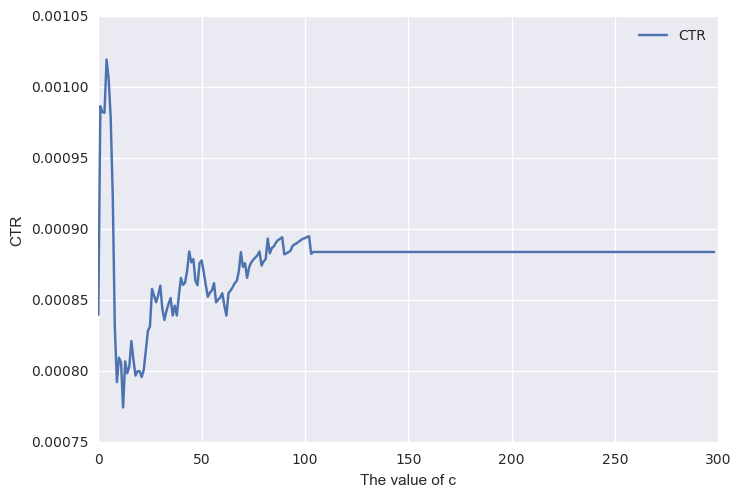

In [477]:
#plt.plot(qian_diff_c_6250['clicks'], label ="clicks")
plt.plot(qian_diff_c_6250['ctr'], label ="CTR") 
#plt.plot(qian_diff_c_6250['cpc'], label ="CPC")
plt.xlabel("The value of c")
plt.ylabel("CTR")
plt.legend(loc=0)
plt.show()
#plt.tight_layout()
#plt.savefig('cvalue_ctr.png',dpi=400)

In [378]:
qian_diff_c_6250=pd.DataFrame(treebest, columns=['ctr','spend','cpc','cpm','clicks'])

In [379]:
qian_diff_c_6250.to_csv("qian_diff_c_6250.csv")

In [220]:

bid_price_nonlinear=[]
for b in list(tree_pctr['0']):
        bid_price_nonlinear.append(get_optimalbidprice(b,8))
validation_budget(bid_price_nonlinear,6250)

[0.00092299670962241686,
 5700.71,
 43.516870229007637,
 0.040165928034439753,
 131]

In [165]:
def validation_budget(bidding,budget):
    new= validation.assign(bidding = bidding, diff= bidding -validation['payprice'])
    new= new[new['diff'] >= 0]
    cost= 0
    index= 0
    for pay in new.payprice:
        cost= pay + cost
        index += 1
        if cost/1000 >= budget:
            break
        
    
    clicks =sum(new['click'][:index])
    ctr= clicks/index
    spend = sum(new['payprice'][:index])/1000
    cpc = spend/clicks
    cpm = spend/index
    return [ctr,spend,cpc,cpm,clicks]

In [269]:
len(mingdalist), len(validation)

In [161]:
val_avgCTR=sum(validation['click'])/len(validation)
base_bid=300
mingdaprice=base_bid * (mingdalist/val_avgCTR)

In [167]:
validation_budget(mingdaprice,6250)[4]

78

In [368]:
#build the linear bidding evaluation with different basebid and save it to csv
mingda_lin300_6250=[validation_budget(i * (mingdalist/val_avgCTR),6250) for i in range (0,300)]
pd.DataFrame(mingda_lin300_6250,columns=['ctr','spend','cpc','cpm','clicks']).to_csv("mingda_lin300_6250.csv")

In [361]:

qian_lin300_6250=[validation_budget(i * (treelist/val_avgCTR),6250) for i in range (0,300)] 


In [369]:
pd.DataFrame(qian_lin300_6250,columns=['ctr','spend','cpc','cpm','clicks']).to_csv("qian_lin300_6250.csv")

In [370]:
feier_lin300_6250=[validation_budget(i * (feierlist/val_avgCTR),6250) for i in range (0,300)]

In [371]:
pd.DataFrame(feier_lin300_6250,columns=['ctr','spend','cpc','cpm','clicks']).to_csv("feier_lin300_6250.csv")

In [4]:
qian_lin300_6250=pd.read_csv('qian_lin300_6250.csv')# column as ctr	spend	cpc	cpm	clicks

In [5]:
mingda_lin300_6250=pd.read_csv('mingda_lin300_6250.csv')

In [25]:
feier_lin300_6250=pd.read_csv('feierfinal.csv')

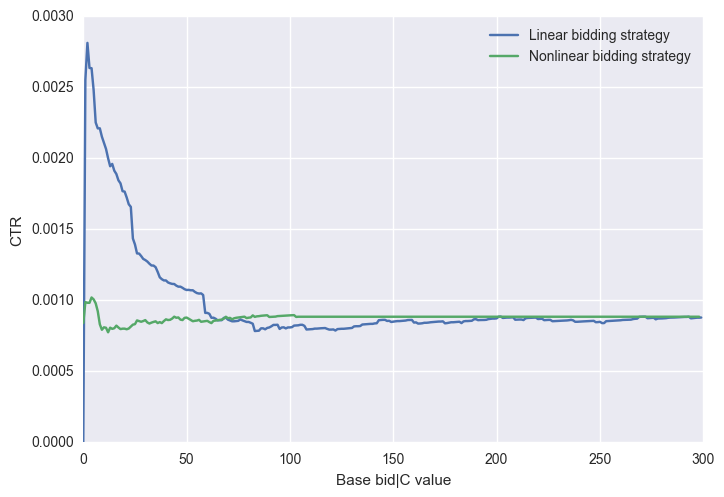

In [92]:
plt.plot(qian_lin300_6250['ctr'], label ="Linear bidding strategy")
#plt.plot(mingda_lin300_6250['ctr'], label="FTRL")
plt.plot(qian_diff_c_6250['ctr'],label="Nonlinear bidding strategy")
plt.xlabel("Base bid|C value")
plt.ylabel("CTR")
plt.legend(loc=0)
plt.show()
#plt.tight_layout()
#plt.savefig('qian_compare_ctr.png',dpi=400)

In [56]:
plt.plot(qian_lin300_6250['clicks'], label ="Linear bidding strategy")
#plt.plot(mingda_lin300_6250['ctr'], label="FTRL")
plt.plot(qian_diff_c_6250['clicks'],label="Nonlinear bidding strategy")
plt.xlabel("Base bid|C value")
plt.ylabel("Clicks")
plt.legend(loc=0)
#plt.show()
plt.tight_layout()
plt.savefig('qian_compare_clicks.png',dpi=400)

In [60]:
plt.plot(qian_lin300_6250['cpc'], label ="Linear bidding strategy")
#plt.plot(mingda_lin300_6250['ctr'], label="FTRL")
plt.plot(qian_diff_c_6250['cpc'],label="Nonlinear bidding strategy")
plt.xlabel("Base bid|C value")
plt.ylabel("Cpc")
plt.legend(loc=4)
#plt.show()
plt.tight_layout()
plt.savefig('qian_compare_cpc.png',dpi=400)

In [64]:
plt.plot(qian_lin300_6250['spend'], label ="Linear bidding strategy")
#plt.plot(mingda_lin300_6250['ctr'], label="FTRL")
plt.plot(qian_diff_c_6250['spend'],label="Nonlinear bidding strategy")
plt.xlabel("Base bid|C value")
plt.ylabel("Spend")
plt.legend(loc=4)
#plt.show()
plt.tight_layout()
plt.savefig('qian_compare_spend.png',dpi=400)

In [74]:
plt.plot(qian_lin300_6250['cpm'], label ="Linear bidding strategy")
#plt.plot(mingda_lin300_6250['ctr'], label="FTRL")
plt.plot(qian_diff_c_6250['cpm'],label="Nonlinear bidding strategy")
plt.xlabel("Base bid|C value")
plt.ylabel("CPM")
plt.legend(loc=4)
#plt.show()
#plt.tight_layout()
#plt.savefig('qian_compare_cpm.png',dpi=400)

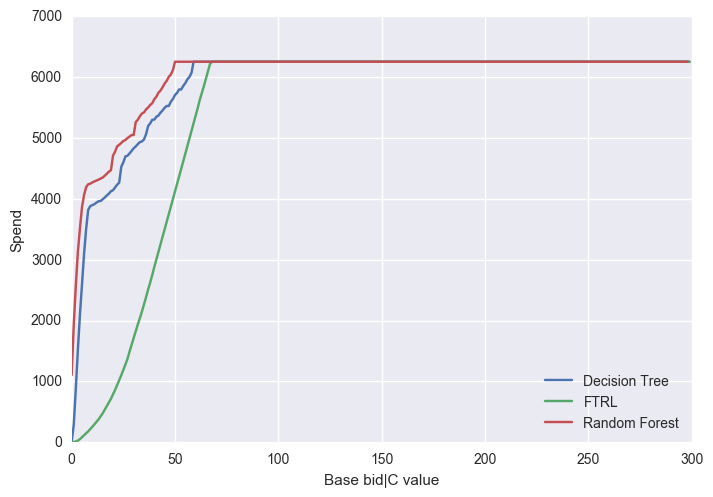

In [70]:
plt.plot(qian_lin300_6250['spend'], label ="Decision Tree")
plt.plot(mingda_lin300_6250['spend'], label="FTRL")
plt.plot(feier_lin300_6250['Spend'],label="Random Forest")
plt.xlabel("Base bid|C value")
plt.ylabel("Spend")
plt.legend(loc=0)
plt.show()
#plt.tight_layout()
#plt.savefig('3best_spend.png',dpi=400)

In [39]:
plt.plot(qian_lin300_6250['cpc'], label ="Decision Tree")
plt.plot(mingda_lin300_6250['cpc'], label="FTRL")
plt.plot(feier_lin300_6250['CPC'],label="Random Forest")
plt.xlabel("Base bid|C value")
plt.ylabel("CPC")
plt.legend(loc=0)
#plt.show()
plt.tight_layout()
plt.savefig('3best_cpc.png',dpi=400)

In [ ]:
plt.plot(qian_lin300_6250['cpc'], label ="Decision Tree")
plt.plot(mingda_lin300_6250['cpc'], label="FTRL")
plt.plot(feier_lin300_6250['CPC'],label="Random Forest")
plt.xlabel("Base bid|C value")
plt.ylabel("CPC")
plt.legend(loc=0)
#plt.show()
plt.tight_layout()
plt.savefig('3best_cpc.png',dpi=400)

In [44]:
qian_diff_c_6250=pd.read_csv('qian_diff_c_6250.csv')

In [49]:
max(list(qian_lin300_6250['clicks']))

132

In [50]:
max(list(qian_diff_c_6250['clicks']))

131

In [412]:
qian_lin_click=get_lin_n(qian_lin300_6250,4)

In [413]:
,mingda_lin_clicks=get_lin_n(mingda_lin300_6250,4)#,feier_lin_clicks=get_lin_n(feier_lin300_6250,4)

In [414]:
feier_lin_clicks=get_lin_n(feier_lin300_6250,4)

In [416]:
plt.plot(qian_lin_click, label ="Decision Tree")
plt.plot(mingda_lin_clicks, label="FTRL")
plt.plot(feier_lin_clicks,label="Random Forest")
plt.xlabel("Base bid")
plt.ylabel("Clicks")
plt.legend(loc=0)
#plt.show()
plt.tight_layout()
plt.savefig('linearclick.png',dpi=400)

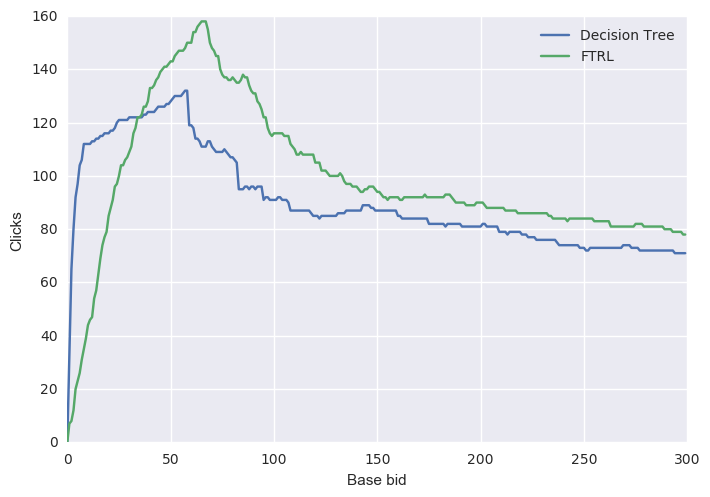

In [313]:
#all ctr linear bidding strategy performance at different basebid
plt.plot(treebest_clicks_lin, label ="Decision Tree")
plt.plot(mingdaclicks_underbudget, label="FTRL")
plt.xlabel("Base bid")
plt.ylabel("Clicks")
plt.legend(loc=0)
plt.show()


In [ ]:
def random_budget(low,h,budget,df):
    bidding = [np.random.randint(low=low,high=h)  for i in range(len(df))]
    new= df.assign(bidding = bidding, diff= bidding -df['payprice'])
    new= new[new['diff'] >= 0]
    cost= 0
    index= 0
    for pay in new.payprice:
        cost= pay + cost
        index += 1
        if cost/1000 >= budget:
            break
        
    
    clicks =sum(new['click'][:index])
    ctr= clicks/index
    spend = sum(new['payprice'][:index])/1000
    cpc = spend/clicks
    cpm = spend/index
    return [ctr,spend,cpc,cpm,clicks]

#calculate random bidding evaluation matrix
 train_random=[]
for i in range(1,300):
    b=random_budget(0, i ,6250, train)
    train_random.append(b[4])
    
val_random=[]
for i in range(1,300):
    a=random_budget(0, i ,6250, train)
    train_random.append(a[4])
   

In [254]:
#conduct performance evaluation on traindata
def train_budget(bidding,budget):
    new= train.assign(bidding = bidding, diff= bidding -train['payprice'])
    new= new[new['diff'] >= 0]
    cost= 0
    index= 0
    for pay in new.payprice:
        cost= pay + cost
        index += 1
        if cost/1000 >= budget:
            break
        
    
    clicks =sum(new['click'][:index])
    ctr= clicks/index
    spend = sum(new['payprice'][:index])/1000
    cpc = spend/clicks
    cpm = spend/index
    return [ctr,spend,cpc,cpm,clicks]

In [ ]:
def random_budget(low,h,budget,df):
    bidding = [np.random.randint(low=low,high=h)  for i in range(len(df))]
    new= df.assign(bidding = bidding, diff= bidding -df['payprice'])
    new= new[new['diff'] >= 0]
    cost= 0
    index= 0
    for pay in new.payprice:
        cost= pay + cost
        index += 1
        if cost/1000 >= budget:
            break
        
    
    clicks =sum(new['click'][:index])
    ctr= clicks/index
    spend = sum(new['payprice'][:index])/1000
    cpc = spend/clicks
    cpm = spend/index
    return [ctr,spend,cpc,cpm,clicks]
    

In [ ]:
#produce random bidding graph
random_100 = [random_budget(0,165,6250,validation) for _ in range(100)]
random_100_clicks=[random_100[i][4] for i in range(100)]
random_100_clicks_df=pd.DataFrame(random_100_clicks)
plt.figure()
ran_train=random_100_clicks_df[0].plot(kind='hist')
ran_train.set_ylabel('Clicks')
ran_train.set_xlabel('The upper bound')

plt.tight_layout()
plt.savefig('randombiddingdist.png',dpi=400)

plt.hist(random_100_clicks)

In [ ]:
df_random=[]
for i in range (1,300):
    a=random_budget(0,i,6250,validation)
    df_random.append(a[4])
    
    train_random=[]
for i in range(1,300):
    b=random_budget(0, i ,6250, train)
    train_random.append(b[4])


In [ ]:
df_random=pd.DataFrame(df_random)
df_random.to_csv('random bidding on valdata need traindata.csv')

random_x=range(1,300)
plt.plot(random_x,df_random)
plt.xlabel('Random bid')
plt.ylabel('Clicks')
plt.figure()

randomx= df_random[0].plot()
randomx.set_ylabel('Clicks')
randomx.set_xlabel('Random bidding price')

plt.grid(True)
plt.tight_layout()
plt.savefig('ran_bid_vali.png',dpi=400)

## constant bidding 

In [ ]:
def constant_budget(bid,budget):
    bidding = [bid  for i in range(len(train))]
    new= train.assign(bidding = bidding, diff= bidding -train['payprice'])
    new= new[new['diff'] >= 0]
    cost= 0
    index= 0
    for pay in new.payprice:
        cost= pay + cost
        index += 1
        if cost/1000 >= budget:
            break
        
    
    clicks =sum(new['click'][:index])
    ctr= clicks/index
    spend = sum(new['payprice'][:index])/1000
    cpc = spend/clicks
    cpm = spend/index
    return [ctr,spend,cpc,cpm,clicks]


constant_r_train=[]
for i in range(1,300):
    a= constant_budget(i,6250)
    constant_r_train.append(a)

In [ ]:

constant_clicks = [i[4] for i in constant_r]
constant_clicksdf[0]
constant_clicks_train.index(max(constant_clicks_train))
constant_clicksdf[0]

In [ ]:
plt.figure()
ax= constant_clicksdf[0].plot(label='Validation data')
ax=constant_clicks_traindf[0].plot(label='Train data')
ax.set_ylabel('Clicks')
ax.set_xlabel('Bid price')
#ax.set_xticks(np.arange(0,305,20))
#ax.set_yticks(np.arange(0,100,1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('cons_bid_train_vali.png',dpi=400)

## evaluate estimator with RMSE and AUC

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

true_click=validation['click']
mean_squared_error(true_click,tree_click_ctr )

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

#roc_curve(true_click, lg_click_ctr, pos_label=2)  fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(true_click, lg_click_ctr)
print ("The AUC is:",metrics.auc(fpr, tpr))
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#roc_auc = auc(fpr, tpr)

In [ ]:
lin_lg_result=[result(i * (lg_click_ctr/val_avgCTR)) for i in range(1,300)]

In [253]:
train_avgCTR=sum(train.click)/len(train)
train_avgCTR

0.0007539649884458758

## test on ctr estimator ensembling

In [247]:
finalist = [treelist[i]+mingdalist[i] for i in range(len(mingdalist))]

In [ ]:
best = []
for c in range(1,200,1):
   
    bid_price_nonlinear=[]
    for b in finalist:
        
        bid_price_nonlinear.append(get_optimalbidprice(b,c))
    #validation_budget(bid_price_nonlinear,6250)
    best.append(validation_budget(bid_price_nonlinear,6250)[4])
    print(validation_budget(bid_price_nonlinear,6250)[4])

In [288]:
ftrlpd=pd.read_csv('ftrltrain.csv')

In [291]:
ftrllist=list(ftrlpd['target'])

In [294]:
len(ftrllist), len(validation)

(2697738, 299749)

In [295]:
ftr_avg=sum(ftrllist)/len(ftrllist)

In [296]:
ftr_clicks_lin=[train_budget(i * (ftrllist/ftr_avg),6250)[4] for i in range (0,300)]

In [300]:
ftr_clicks_lin.index(max(ftr_clicks_lin))

21

In [305]:
mingdaclicks_underbudget[21]


88

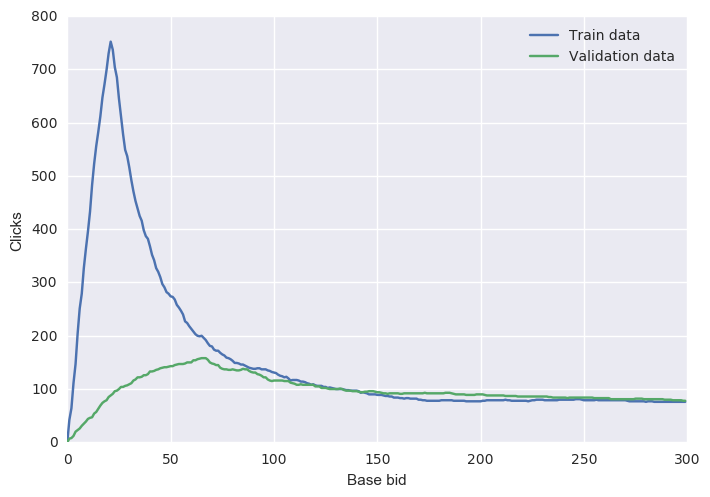

In [312]:
#mingda ctr on both train and validation data, linear bidding performance with different base bid
plt.plot(ftr_clicks_lin, label='Train data')
plt.plot(mingdaclicks_underbudget, label='Validation data')
plt.xlabel("Base bid")
plt.ylabel("Clicks")
plt.legend(loc=0)
plt.show()

#plt.tight_layout()
#plt.savefig('mingdactr_ontrain_validation.png',dpi=400)